# CNN for CIFAR

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd,numpy as np,matplotlib.pyplot as plt, os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

device

device(type='cpu')

## Load Dataset

In [19]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [20]:
#Load Data
file_name = "data_batch_{}"
i = 1
data = unpickle(file_name.format(i))

In [21]:
#Examine Data types and sizes
train_images = data[b'data']
print("Train Images")
print("Type: {}".format(type(train_images)))
print("Shape: {}".format(train_images.shape))
train_labels = np.array(data[b'labels'])
print("Train Labels")
print("Type: {}".format(type(train_labels)))
print("Shape: {}".format(train_labels.shape))

Train Images
Type: <class 'numpy.ndarray'>
Shape: (10000, 3072)
Train Labels
Type: <class 'numpy.ndarray'>
Shape: (10000,)


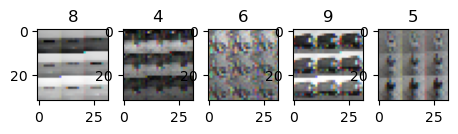

In [22]:
#Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, random_state=8
                                             ,test_size=0.25)

#Reshape flat row. Note that there are 3 channels and image size is 32*32
train_images = train_images.reshape(train_images.shape[0],3,32, 32)
val_images = val_images.reshape(val_images.shape[0],3,32, 32)

#Showing some images
for i in range(100, 105):
    plt.subplot(160 + (i+1))
    plt.imshow(train_images[i].reshape(32,32,3))
    plt.title(train_labels[i])

## Prepare for tensor

In [23]:
#Normalize and convert training images
train_images_t = torch.tensor(train_images)/255.0
train_images_t = train_images_t.view(-1,3,32,32)
train_labels_t = torch.tensor(train_labels)
train_t = TensorDataset(train_images_t, train_labels_t)

#Normalize and convert validation images
val_images_t = torch.tensor(val_images)/255.0
val_images_t = val_images_t.view(-1,3,32,32)
val_labels_t = torch.tensor(val_labels)
val_t = TensorDataset(val_images_t, val_labels_t)

#Load into the data generator
train_loader = DataLoader(train_t, batch_size=64, num_workers=2, shuffle=True)
val_loader = DataLoader(val_t, batch_size=64, num_workers=2, shuffle=True)

